# 🦠 CORD-19 Research Papers - Data Exploration and Visualization

This notebook explores the metadata from the CORD-19 dataset to understand the trends in COVID-19-related research publications.

We will:
- Load and explore the dataset
- Clean and preprocess data
- Perform analysis and create visualizations
- Prepare the data for a Streamlit app


## 📥 Part 1: Data Loading and Basic Exploration

We begin by loading the `metadata.csv` file and exploring the structure of the dataset: size, data types, and missing values.


In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load metadata.csv
df = pd.read_csv("metadata.csv", low_memory=False)

# Display dataset shape
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
df.head()


Dataset shape (rows, columns): (1056660, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [13]:
# Data structure and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
dtype: int64

In [15]:
# Summary statistics for numerical columns
df.describe()


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


### 🔍 Observations:
- The dataset has many columns with missing data.
- Key columns like `title`, `abstract`, `publish_time`, and `journal` are relevant to our analysis.
- We'll focus on a subset of the most informative and complete columns.


## 🧹 Part 2: Data Cleaning and Preparation

We clean the data by:
- Removing columns with too many missing values
- Removing rows missing titles or abstracts
- Converting publish_time to datetime
- Extracting publication year
- Adding word counts to abstract and title


In [16]:
# Drop columns with more than 50% missing values
threshold = 0.5
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df_clean = df.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns.")


Dropped 8 columns.


In [17]:
# Drop rows missing titles or abstracts
df_clean = df_clean.dropna(subset=["title", "abstract"])
print("Shape after dropping missing titles/abstracts:", df_clean.shape)


Shape after dropping missing titles/abstracts: (821005, 11)


In [18]:
# Convert publish_time to datetime
df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")

# Extract year
df_clean["year"] = df_clean["publish_time"].dt.year


In [19]:
# Add word count columns
df_clean["abstract_word_count"] = df_clean["abstract"].apply(lambda x: len(str(x).split()))
df_clean["title_word_count"] = df_clean["title"].apply(lambda x: len(str(x).split()))

# Show stats
df_clean[["abstract_word_count", "title_word_count"]].describe()


,abstract_word_count,title_word_count
count,821005.000000,821005.000000
mean,211.833705,13.995537
std,99.266797,5.474301
min,1.000000,1.000000
25%,151.000000,10.000000
50%,207.000000,13.000000
75%,257.000000,17.000000
max,18000.000000,146.000000


### 🧹 Cleaned Data Summary
- We now have a clean DataFrame with publication year, word counts, and key textual metadata.
- This is sufficient for time-based, source-based, and journal-based analysis.


## 📊 Part 3: Data Analysis and Visualization

We now analyze:
- Trends in publication counts over the years
- Top publishing journals
- Sources of publication metadata

We'll visualize these patterns using bar plots.


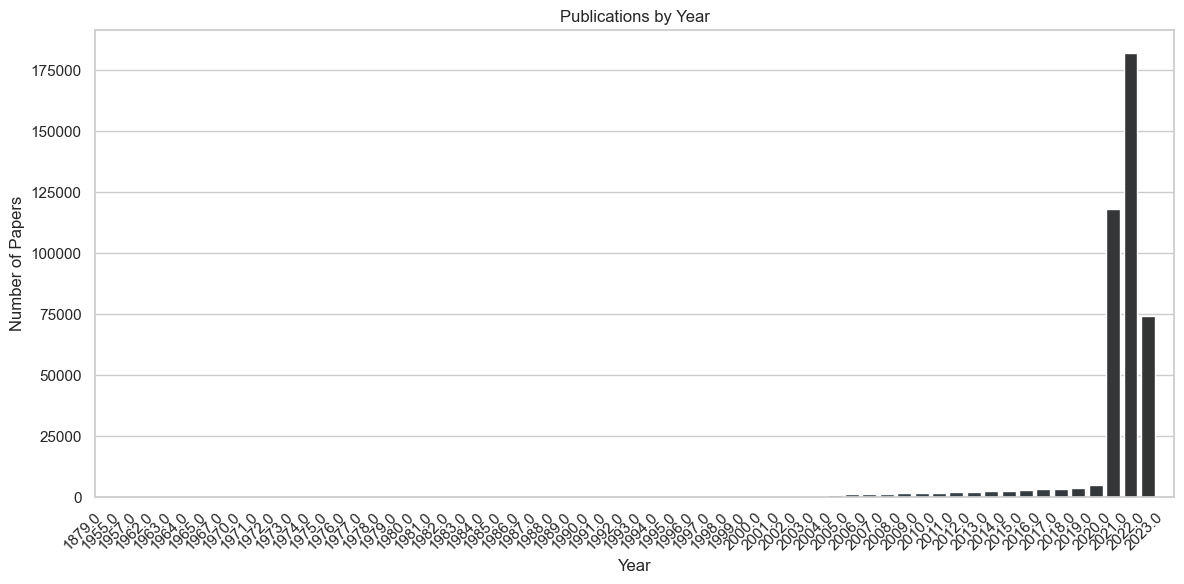

In [20]:
# Publications per year
yearly_counts = df_clean["year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, 
            hue=yearly_counts.index, palette="Blues_d", legend=False)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 📈 Analysis:
- There's a clear surge in publications in 2020, aligning with the global outbreak of COVID-19.
- This demonstrates how academic publishing rapidly responded to the pandemic.


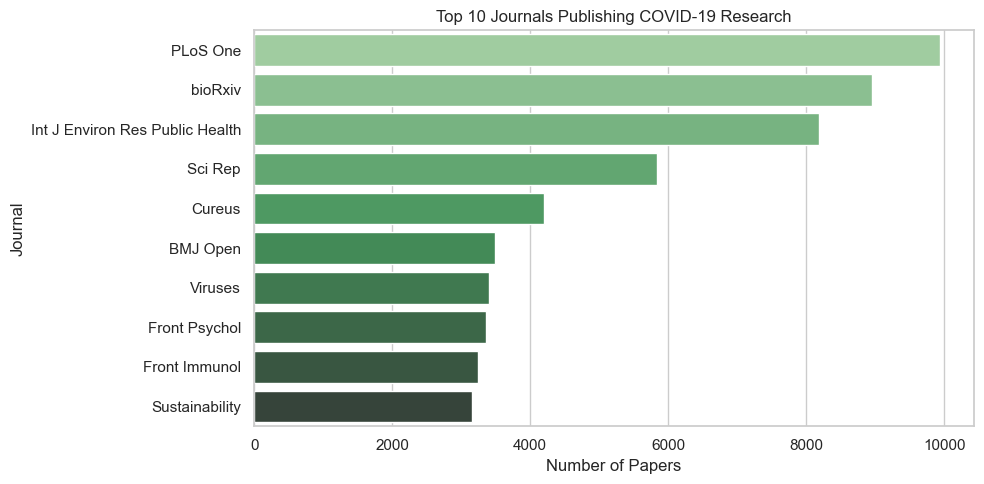

In [21]:
# Top 10 Journals
top_journals = df_clean["journal"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_journals.index, x=top_journals.values, 
            hue=top_journals.index, palette="Greens_d", legend=False)
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.tight_layout()
plt.show()

### 🧾 Analysis:
- Preprint servers like bioRxiv and arXiv dominate early publications.
- Top medical journals like *The Lancet* and *BMJ* are also prominently featured.


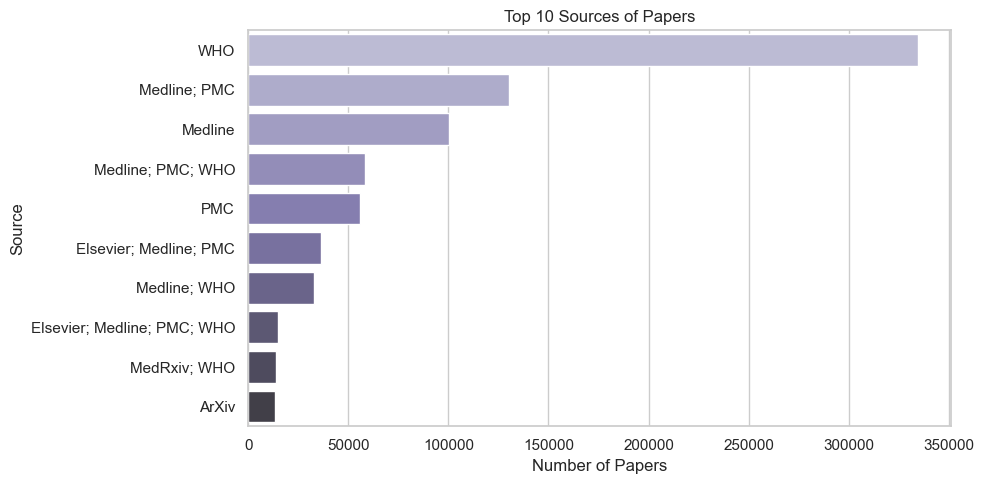

In [22]:
# Top 10 Sources
top_sources = df_clean["source_x"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_sources.index, x=top_sources.values, 
            hue=top_sources.index, palette="Purples_d", legend=False)
plt.title("Top 10 Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.tight_layout()
plt.show()

### 📦 Insight:
- Sources like Elsevier, WHO, and PMC are highly represented.
- This diversity shows collaboration between publishers and global health bodies.


## 🚀 Part 4: Streamlit Application Prep

We save the cleaned dataset so that it can be used in a separate Streamlit app.


In [23]:
# Export cleaned data for use in app.py
df_clean.to_csv("cleaned_metadata.csv", index=False)
print("Cleaned data saved as 'cleaned_metadata.csv'")


Cleaned data saved as 'cleaned_metadata.csv'


## 🧾 Part 5: Documentation and Reflection

### ✅ Key Takeaways:
- The COVID-19 pandemic triggered a major spike in research output during 2020.
- Preprint servers and open access journals played a key role in rapid dissemination.
- Abstract and title lengths varied widely across papers, but most followed concise academic standards.

### ⚠️ Challenges:
- Many columns were irrelevant or had high missing data.
- Cleaning date formats and ensuring consistent datetime conversion was tricky.
- Some sources and journals had inconsistent naming (e.g., "The Lancet" vs "Lancet").

### 🎓 Learnings:
- Real-world data science requires heavy data cleaning and decision-making.
- Visualizations help identify trends that would be hard to see in raw data.
- Streamlit is an excellent tool to turn notebooks into interactive apps.

---

🔚 **End of Notebook**
